In [24]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
%run "./common_init.ipynb"

In [26]:
%autoreload 2
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Load custom code
import kdd98.data_handler as dh
from kdd98.config import Config
import pickle

In [27]:
# Where to save the figures
PROJECT_ROOT_DIR = "../../"
CHAPTER_ID = "feature_extraction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "figures", CHAPTER_ID)

if not os.path.exists(IMAGES_PATH):
    os.makedirs(IMAGES_PATH)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Finding relevant features

In [11]:
with open(pathlib.Path(Config.get("df_store"), "learn_features.pkl"), "rb") as f:
    kdd98_learn_feat = pickle.load(f)
with open(pathlib.Path(Config.get("df_store"), "learn_targets.pkl"), "rb") as f:
    kdd98_learn_targets = pickle.load(f)

In [18]:
kdd98_learn_feat.describe()

,RECINHSE,AGE,AGEFLAG,HOMEOWNR,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBBOOKS,...,RFA_24R_P,RFA_24R_S,RFA_24R_U,RFA_24R_nan,DOMAINUrbanicity_C,DOMAINUrbanicity_R,DOMAINUrbanicity_S,DOMAINUrbanicity_T,DOMAINUrbanicity_U,DOMAINUrbanicity_nan
count,76329.000000,76329.000000,76329.000000,76329.000000,76329.000000,76329.000000,76329.000000,76329.000000,76329.000000,76329.000000,...,76329.000000,76329.000000,76329.000000,76329.0,76329.000000,76329.000000,76329.000000,76329.000000,76329.000000,76329.0
mean,0.070746,61.376384,7.229258,1.112216,1.347889,4.474461,6.085378,3.321634,1.544550,0.409194,...,3.584279,-4.275544,-0.133275,0.0,-8.180613,-11.691289,28.668293,-4.466742,1.183771,0.0
std,0.256402,15.470849,520.608326,19.083837,6.525188,45.392640,7.892339,9.177437,36.637476,26.858891,...,647.146711,766.518287,26.454523,0.0,761.540398,1099.317256,2586.178124,413.030898,88.737699,0.0
min,0.000000,-230.883240,-269.442565,-664.574940,-274.494360,-1813.340839,-335.836648,0.000000,-376.513467,-592.137376,...,-37588.993105,-226.537924,-14.268536,0.0,-68479.881324,-103914.646282,-4017.465340,-39532.945168,-262.746314,0.0
25%,0.000000,50.330159,0.000000,0.000000,0.932634,2.000000,4.551258,0.000000,0.000000,0.000000,...,0.000000,-36.569796,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,61.000000,1.000000,1.000000,1.211074,4.000000,6.960187,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,73.000000,1.000000,1.000000,1.595117,6.000000,9.000000,3.000000,3.626852,9.069109,...,35.536120,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,619.922711,24228.549504,249.961882,343.089701,476.303723,34.438412,241.000000,2004.386605,59.817267,...,205.547437,45145.611383,1323.283846,0.0,966.991581,2812.516415,239952.617816,518.807065,9491.437733,0.0


In [12]:
kdd98_learn_targets.describe()

,TARGET_B,TARGET_D
count,76329.000000,76329.000000
mean,0.050754,0.799556
std,0.219496,4.493090
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,200.000000


### Boruta

In [13]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

In [16]:
# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced_subsample', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=Config.get("random_seed"))

In [19]:
# find all relevant features
feat_selector.fit(kdd98_learn_feat.values, kdd98_learn_targets.TARGET_B.values)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	660
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	660
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	660
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	660
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	660
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	660
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	660
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	74
Tentative: 	70
Rejected: 	516


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	9 / 100
Confirmed: 	74
Tentative: 	70
Rejected: 	516


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 100
Confirmed: 	74
Tentative: 	70
Rejected: 	516


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 100
Confirmed: 	74
Tentative: 	70
Rejected: 	516


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 100
Confirmed: 	74
Tentative: 	54
Rejected: 	532


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 100
Confirmed: 	74
Tentative: 	54
Rejected: 	532


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 100
Confirmed: 	74
Tentative: 	54
Rejected: 	532


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 100
Confirmed: 	74
Tentative: 	54
Rejected: 	532


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 100
Confirmed: 	75
Tentative: 	44
Rejected: 	541


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 100
Confirmed: 	75
Tentative: 	44
Rejected: 	541


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 100
Confirmed: 	75
Tentative: 	44
Rejected: 	541


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 100
Confirmed: 	75
Tentative: 	35
Rejected: 	550


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 100
Confirmed: 	75
Tentative: 	35
Rejected: 	550


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 100
Confirmed: 	75
Tentative: 	35
Rejected: 	550


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 100
Confirmed: 	75
Tentative: 	27
Rejected: 	558


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 100
Confirmed: 	75
Tentative: 	27
Rejected: 	558


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 100
Confirmed: 	75
Tentative: 	27
Rejected: 	558


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 100
Confirmed: 	75
Tentative: 	27
Rejected: 	558


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 100
Confirmed: 	75
Tentative: 	27
Rejected: 	558


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 100
Confirmed: 	75
Tentative: 	27
Rejected: 	558


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 100
Confirmed: 	75
Tentative: 	26
Rejected: 	559


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	29 / 100
Confirmed: 	75
Tentative: 	23
Rejected: 	562


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	30 / 100
Confirmed: 	75
Tentative: 	23
Rejected: 	562


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	31 / 100
Confirmed: 	75
Tentative: 	23
Rejected: 	562


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	32 / 100
Confirmed: 	75
Tentative: 	17
Rejected: 	568


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	33 / 100
Confirmed: 	75
Tentative: 	17
Rejected: 	568


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	34 / 100
Confirmed: 	75
Tentative: 	15
Rejected: 	570


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	35 / 100
Confirmed: 	75
Tentative: 	15
Rejected: 	570


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	36 / 100
Confirmed: 	75
Tentative: 	15
Rejected: 	570


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	37 / 100
Confirmed: 	75
Tentative: 	14
Rejected: 	571


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	38 / 100
Confirmed: 	75
Tentative: 	14
Rejected: 	571


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	39 / 100
Confirmed: 	75
Tentative: 	14
Rejected: 	571


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	40 / 100
Confirmed: 	75
Tentative: 	12
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	53 / 100
Confirmed: 	75
Tentative: 	12
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	54 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	55 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	56 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	57 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	58 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	59 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	60 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	61 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	62 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	63 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	64 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	65 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	66 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	67 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	68 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	69 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	70 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	71 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	72 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	73 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	74 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	75 / 100
Confirmed: 	76
Tentative: 	10
Rejected: 	574


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	76 / 100
Confirmed: 	76
Tentative: 	10
Rejected: 	574


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	77 / 100
Confirmed: 	76
Tentative: 	10
Rejected: 	574


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	78 / 100
Confirmed: 	76
Tentative: 	10
Rejected: 	574


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	79 / 100
Confirmed: 	76
Tentative: 	10
Rejected: 	574


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	80 / 100
Confirmed: 	76
Tentative: 	10
Rejected: 	574


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	81 / 100
Confirmed: 	76
Tentative: 	10
Rejected: 	574


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	82 / 100
Confirmed: 	76
Tentative: 	10
Rejected: 	574


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	83 / 100
Confirmed: 	76
Tentative: 	10
Rejected: 	574


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	84 / 100
Confirmed: 	76
Tentative: 	10
Rejected: 	574


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	85 / 100
Confirmed: 	76
Tentative: 	9
Rejected: 	575


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	86 / 100
Confirmed: 	76
Tentative: 	9
Rejected: 	575


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	87 / 100
Confirmed: 	76
Tentative: 	9
Rejected: 	575


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	88 / 100
Confirmed: 	76
Tentative: 	9
Rejected: 	575


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	89 / 100
Confirmed: 	76
Tentative: 	9
Rejected: 	575


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	90 / 100
Confirmed: 	77
Tentative: 	8
Rejected: 	575


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	91 / 100
Confirmed: 	77
Tentative: 	8
Rejected: 	575


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	92 / 100
Confirmed: 	77
Tentative: 	8
Rejected: 	575


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	93 / 100
Confirmed: 	77
Tentative: 	8
Rejected: 	575


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	94 / 100
Confirmed: 	77
Tentative: 	8
Rejected: 	575


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	95 / 100
Confirmed: 	77
Tentative: 	8
Rejected: 	575


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	96 / 100
Confirmed: 	77
Tentative: 	8
Rejected: 	575


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	97 / 100
Confirmed: 	77
Tentative: 	8
Rejected: 	575


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	98 / 100
Confirmed: 	77
Tentative: 	8
Rejected: 	575
Iteration: 	99 / 100
Confirmed: 	77
Tentative: 	8
Rejected: 	575


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	77
Tentative: 	1
Rejected: 	575


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


BorutaPy(alpha=0.05,
     estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=260, n_jobs=-1, oob_score=False,
            random_state=<mtrand.RandomState object at 0x7f08ac18e558>,
            verbose=0, warm_start=False),
     max_iter=100, n_estimators='auto', perc=100,
     random_state=<mtrand.RandomState object at 0x7f08ac18e558>,
     two_step=True, verbose=2)

In [13]:
# check selected features
feat_selector.support_

array([False, False, False, False, False,  True, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [14]:
# check ranking of features
feat_selector.ranking_

array([402, 245,  69, 481, 449,   1, 213,  85,   1,  15, 215,   1,   5,
        14,   1,   5,  31,  23,  26,  33,  29,  32,   9,   1,   1, 316,
       109, 121,  88, 171, 259, 197, 506,   1,   1,  61,  66,  61, 313,
       307, 316, 274, 262,  13,  27, 268, 125, 206, 350, 293, 281, 302,
       314, 342, 470, 150, 335, 357, 168,  39, 100, 124,  73, 142, 156,
       136, 132, 232, 230,  97, 184, 158, 273, 177,  53, 209, 186, 221,
       250, 228, 254, 130, 242,  88, 186,   2, 122, 115, 154, 239,  61,
       284, 283,  90,  73, 104, 179, 164, 216, 224, 210, 208, 269, 300,
       338,   1,   1, 106,  67, 109, 104, 234, 214, 192, 112, 147,  78,
       186, 160, 156,   5, 324,   9, 246, 183, 288, 201,  98,  41,  55,
        36, 149,   1,   1,   1,   1,   1,  12, 255,  96, 118, 128, 295,
       278, 130, 230, 286, 178, 164, 284, 298,   1,   1,  19,  70,  48,
        87,   1,   1,   1,   1,   1,   1,  77, 191, 169, 189, 111,   3,
       195,  92, 151,  21, 161, 190, 181,  93,  25, 113,  90, 16

In [15]:
# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(kdd98_learn_feat.values)

In [16]:
kdd98_learn_feat.columns.values[feat_selector.support_]

array(['AGE', 'INCOME', 'MBCRAFT', 'MBCOLECT', 'PUBPHOTO', 'PUBOPP',
       'WEALTH2', 'PEPSTRFL', 'HV1', 'HV2', 'HVP1', 'HVP2', 'HVP3',
       'HVP4', 'HVP5', 'RP1', 'RP2', 'DMA', 'IC1', 'IC2', 'IC3', 'IC4',
       'IC5', 'HHAS3', 'EC7', 'POBC2', 'CARDPROM', 'NUMPROM', 'CARDPM12',
       'NUMPRM12', 'RAMNT_8', 'RAMNT_14', 'RAMNTALL', 'NGIFTALL',
       'CARDGIFT', 'MINRAMNT', 'MAXRAMNT', 'LASTGIFT', 'AVGGIFT',
       'RFA_2F', 'RFA_2A', 'MDMAUD_F', 'RFA_3F', 'RFA_3A', 'RFA_4F',
       'RFA_4A', 'RFA_5F', 'RFA_5A', 'RFA_6F', 'RFA_6A', 'RFA_7F',
       'RFA_7A', 'RFA_8F', 'RFA_8A', 'RFA_9F', 'RFA_9A', 'RFA_10F',
       'RFA_10A', 'RFA_11F', 'RFA_11A', 'RFA_12F', 'RFA_12A', 'RFA_13F',
       'RFA_13A', 'RFA_14F', 'RFA_14A', 'RFA_15F', 'RFA_16F', 'RFA_17F',
       'RFA_21F', 'RFA_23F', 'RFA_24F', 'MONTHS_TO_DONATION_3',
       'MONTHS_TO_DONATION_4', 'MONTHS_TO_DONATION_6',
       'MONTHS_TO_DONATION_7', 'MONTHS_TO_DONATION_9',
       'MONTHS_TO_DONATION_10', 'MONTHS_TO_DONATION_12',
    

In [17]:
kdd98_relevant = pd.DataFrame(data=X_filtered, columns = kdd98_learn_feat.columns.values[feat_selector.support_])

In [21]:
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

In [34]:
scaled = preprocessing.StandardScaler().fit_transform(kdd98_learn_feat)
pca = decomposition.PCA(n_components=0.9)
pca.fit(scaled)
kdd98_learn_feat_pca = pca.transform(scaled)

/data/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/data/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [35]:
kdd98_learn_feat_pca

array([[-5.18253896e+00, -1.59295921e+01,  2.72815377e+00, ...,
         4.36283598e-01,  3.30100993e-01,  1.18774956e-01],
       [ 2.05650373e+01, -5.24034799e-01, -2.31311847e+00, ...,
        -1.10530381e+00, -5.91346026e-02, -6.93170670e-01],
       [-8.02685982e+00, -1.29817384e+01,  9.08820041e-01, ...,
        -5.19658539e-02,  5.33009335e-01,  1.75839334e-01],
       ...,
       [-5.19935409e+00, -2.10832587e-01, -1.85443750e+00, ...,
        -3.32340514e-01,  2.61102702e-01, -1.12790422e+00],
       [ 8.94632082e+00, -1.30284622e+01,  5.32438851e+00, ...,
         1.10875681e+00, -4.10325088e-01,  4.94772501e-01],
       [ 4.22470226e+00, -1.12471297e+01,  9.40872397e-03, ...,
         9.61390148e-01,  6.53236598e-01, -9.28441931e-02]])

In [36]:
pca.components_

array([[-0.00237689,  0.00060668,  0.00201971, ..., -0.05310166,
         0.01373257, -0.00835744],
       [-0.00054493, -0.01960195, -0.00753157, ..., -0.02639833,
         0.03528504,  0.01332466],
       [ 0.00511927,  0.02110952,  0.0080029 , ..., -0.05130658,
         0.05405284,  0.03069628],
       ...,
       [ 0.00173781,  0.05482553, -0.01665619, ..., -0.06437151,
        -0.08520428,  0.09978482],
       [-0.02680474,  0.03832092,  0.01763511, ..., -0.02796125,
         0.04164369, -0.03008553],
       [-0.01638985,  0.08473193,  0.00526197, ..., -0.02071258,
         0.07819271,  0.00805348]])

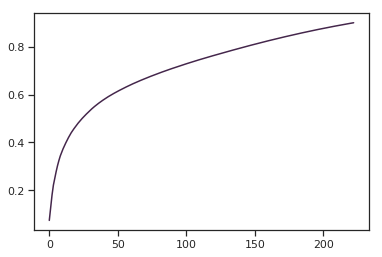

In [41]:
cum_var_expl = np.cumsum(pca.explained_variance_ratio_)
sns.lineplot(data = cum_var_expl)
plt.xlabel = "Number of dimensions"
plt.ylabel = "Variance explained"

In [38]:
pca.n_components_

223

In [39]:
pca.n_features_

624

In [40]:
pca.get_params

<bound method BaseEstimator.get_params of PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)>